In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

##### 1) ID number
##### 2) Diagnosis (M = malignant, B = benign)
3-32
Ten real-valued features are computed for each cell nucleus:

##### a) radius (mean of distances from center to points on the perimeter)
##### b) texture (standard deviation of gray-scale values)
##### c) perimeter
##### d) area
##### e) smoothness (local variation in radius lengths)
##### f) compactness (perimeter^2 / area - 1.0)
##### g) concavity (severity of concave portions of the contour)
##### h) concave points (number of concave portions of the contour)
##### i) symmetry
##### j) fractal dimension ("coastline approximation" - 1)

#### The mean, standard error and "worst" or largest (mean of the three
#### largest values) of these features were computed for each image,
#### resulting in 30 features. 
#### For instance, field 3 is Mean Radius, field
#### 13 is Radius SE, field 23 is Worst Radius.
#### All feature values are recoded with four significant digits.
##### Missing attribute values: none
##### Class distribution: 357 benign, 212 malignant

In [37]:
data = pd.read_csv('data.csv')

In [38]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [41]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [42]:
data[["diagnosis"]].value_counts() #Slighly imbalanced data

diagnosis
B            357
M            212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

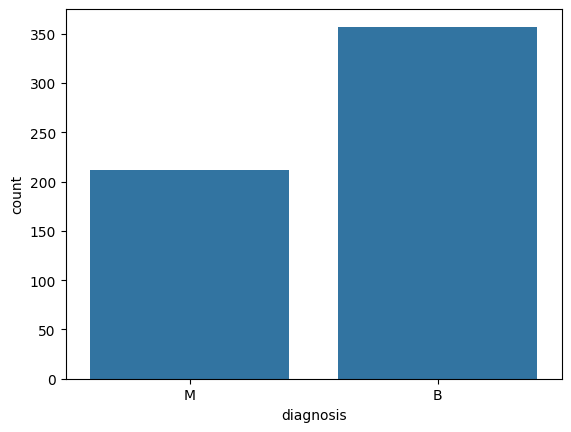

In [43]:
sns.countplot(x="diagnosis",data=data)

In [44]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[["diagnosis"]]=oe.fit_transform(data[["diagnosis"]])

In [45]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


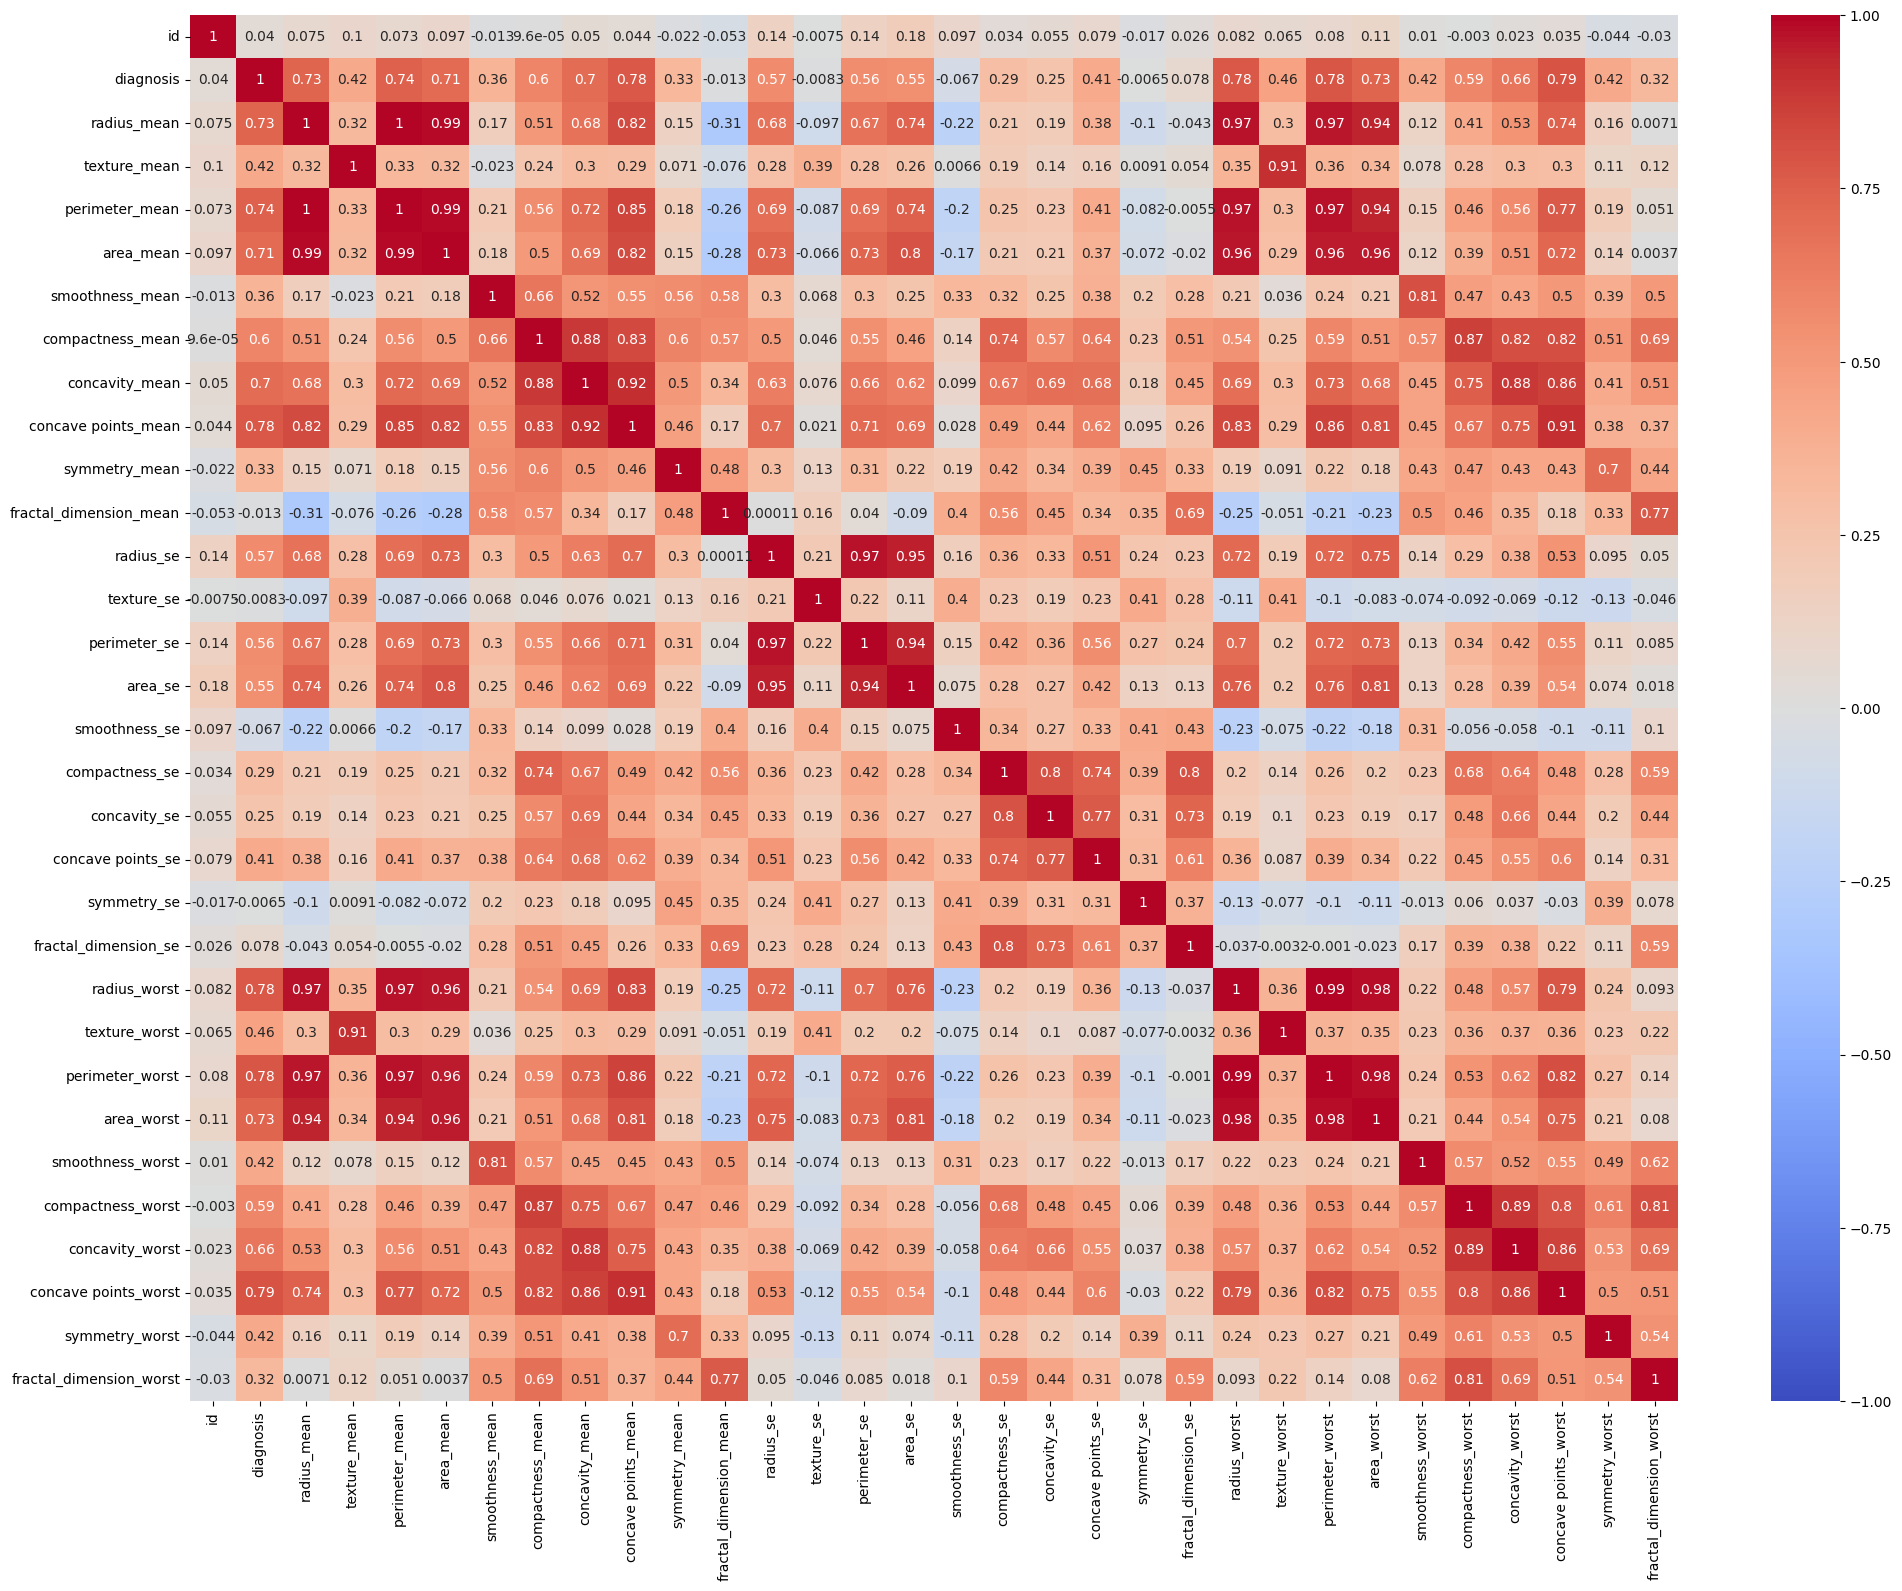

In [46]:
plt.figure(figsize=(24,18))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    cohen_kappa_score, log_loss, matthews_corrcoef,
    classification_report, confusion_matrix
)

In [48]:
#Split Features & Target
X = data.drop(["id","diagnosis"], axis=1)
y = data["diagnosis"]
class_names = y

In [49]:
#Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
#SVM Model
svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [52]:
# Predictions
y_pred = svm.predict(X_test_scaled)
y_prob = svm.predict_proba(X_test_scaled)[:, 1]

In [53]:
#Evaluation
accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
logloss = log_loss(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_acc)
print("Cohen's Kappa:", kappa)
print("Log Loss:", logloss)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Balanced Accuracy: 0.9642857142857143
Cohen's Kappa: 0.9425981873111783
Log Loss: 0.08214961632394367
Matthews Correlation Coefficient (MCC): 0.9441549509633318

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        72
         1.0       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



[[72  0]
 [ 3 39]]


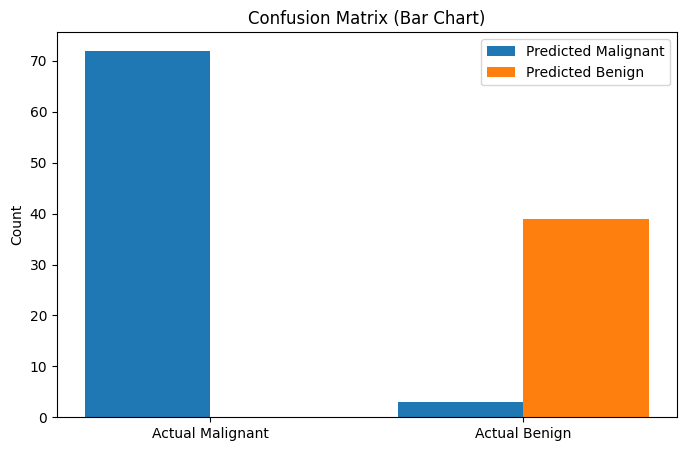

In [54]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8,5))
plt.bar(np.arange(2)-0.2, cm[:,0], width=0.4, label="Predicted Malignant")
plt.bar(np.arange(2)+0.2, cm[:,1], width=0.4, label="Predicted Benign")

plt.xticks([0, 1], ["Actual Malignant", "Actual Benign"])
plt.ylabel("Count")
plt.title("Confusion Matrix (Bar Chart)")
plt.legend()
plt.show()

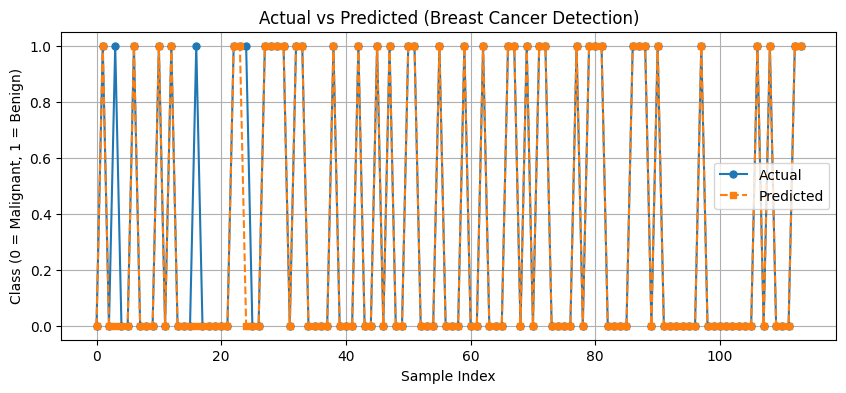

In [55]:
plt.figure(figsize=(10,4))
plt.plot(list(y_test), 'o-', label="Actual", markersize=5)
plt.plot(y_pred, 's--', label="Predicted", markersize=5)
plt.title("Actual vs Predicted (Breast Cancer Detection)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Malignant, 1 = Benign)")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
print("y_test unique:", np.unique(y_test))
print("y_prob shape:", y_prob.shape)
print("y_prob sample:", y_prob[:5])

y_test unique: [0. 1.]
y_prob shape: (114,)
y_prob sample: [0.00157625 0.99999412 0.06061777 0.43984736 0.10259781]


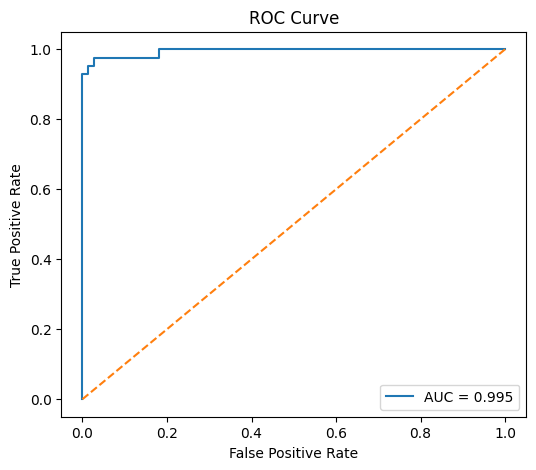

In [58]:
#ROC AUC Curve
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# AUC
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
#Define SVM and Hyperparameter Grid
svm = SVC(probability=True)  # probability=True needed for ROC/AUC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2,3,4]  # only used for poly kernel
}

In [64]:
#GridSearchCV with 5-Fold Cross-Validation
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,                 # 5-fold CV
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


,estimator,SVC(probability=True)
,param_grid,"{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [66]:
#Best Hyperparameters and CV Score

print("Best Hyperparameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Hyperparameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.9758241758241759


In [67]:
#Evaluate Best Model on Test Set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Test Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        72
         1.0       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [68]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72  0]
 [ 3 39]]


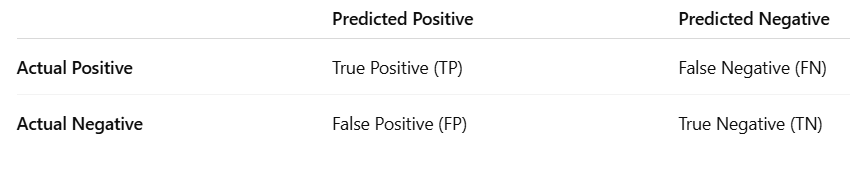

In [69]:
y_pred.shape

(114,)

In [ ]:
#True Positive =72 #Model predicted positive and it was actually positive
#False Positive = 3 #Model predicted positive but it was actually negative (Type-1)
#False Negetive =  0 #Model predicted negative but it was actually positive(Type-II)
#True Negetive = 39 (Model predicted negative and it was actually negative, correct rejection of -ve classes)